# Titanic Dataset Data Science Workflow
## Walkthrough by Srujan Penikelapati

### First, we'll import the necessary libaries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import tree
import seaborn as sns


## Now, we can import the dataset file. 

There are two files, a train and a test file. The train file is the file on which we train our Machine Learning model. We test the performance of our model with the test file.

In [7]:
data = pd.read_csv("/Users/srujanpenikelapati/Documents/git/TitanicDataset/train.csv")


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Exploratory Data Analysis

The first step in the Data Science workflow is doing Exploratory Data Analysis (EDA). This is done to identify trends in our data, and to get familiar with the dataset so Data Cleaning and Feature Engineering will bbe easier. 

In [8]:
print(data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


 - Looking at the data, there are 12 columns, and our goal is to design a model that predicts survival for Titanic passengers.
 - Based on my domain knowledge of the Titanic, I know that women and children were more likely than men to survive.
 - I also think that rich people were more likely to survive.
     - Maybe we can use Fare  or Pclass (Passenger class) as a proxy for wealth?
 - With these preliminary ideas in mind, I can start graphically viewing the data.

In [9]:
#Find Male vs. Female survival Rates

maleSurvived = data[data["Sex"]=="male"]["Survived"]==1 
femaleSurvived = data[data["Sex"]=="female"]["Survived"]==1

print("Percent of males who survived: ", sum(maleSurvived) / len(maleSurvived)) 
print("Percent of females who survived: ", sum(femaleSurvived) / len(femaleSurvived))

Percent of males who survived:  0.18890814558058924
Percent of females who survived:  0.7420382165605095


### Wow! 

Only about **18%** of men survived, while **74%** of women did! Sex is definitely a feature to use to train your model.

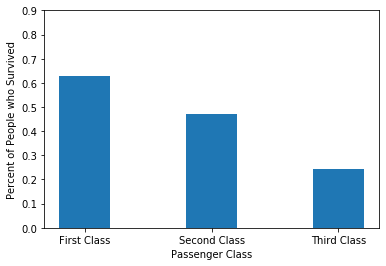

In [12]:
#Survival Percents
survivalPercentsBasedonClass = [sum(firstclassSurvived) / len(firstclassSurvived), sum(secondClassSurvived) / len(secondClassSurvived), sum(thirdClassSurvived) / len(thirdClassSurvived)]
categories = ["First Class", "Second Class", "Third Class"]
xAxisLocations = [0, 2, 4]
plt.bar(xAxisLocations, survivalPercentsBasedonClass)
plt.xticks(xAxisLocations, categories)
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel("Percent of People who Survived")
plt.xlabel("Passenger Class")
plt.show()

In [10]:
#Find survival rates across the 3 Passenger Classes

firstclassSurvived = data[data["Pclass"] == 1]["Survived"] == 1
secondClassSurvived =  data[data["Pclass"] == 2]["Survived"] == 1
thirdClassSurvived = data[data["Pclass"] == 3]["Survived"] == 1

print("Percent of First Class people who survived: ", sum(firstclassSurvived) / len(firstclassSurvived))
print("Percent of Second Class people who survived: ", sum(secondClassSurvived) / len(secondClassSurvived))
print("Percent of Third Class people who survived: ", sum(thirdClassSurvived) / len(thirdClassSurvived))

Percent of First Class people who survived:  0.6296296296296297
Percent of Second Class people who survived:  0.47282608695652173
Percent of Third Class people who survived:  0.24236252545824846


We can also see that Class has an impact on survival. Passengers on first class were twice as likely to survive than Third class passengers.

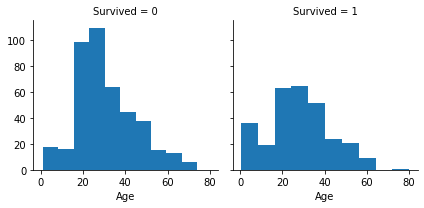

In [15]:
#Age and Survival Numbers (not percents)
x = sns.FacetGrid(data, col="Survived")
x = x.map(plt.hist, "Age")


- I also want to see the relationship with age and survival. Looking at the graph, it appears that middle aged pepople were much more likely to die than live.
- We also see that young people (0-10) were almost twice as likely to survive than die. 
- **Age** does seem to have an influence on the survival of passengers, so we'll make sure to keep that feature. 

### SibSp and Parch

SibSp refers to the number of siblings and spouses a passenger has onboard with them. Parch refers to the number of parents and children the passenger has.

- I hypothesize that a passenger with more parents and children is more likely to stay behind, and not survive.
- One thing I want to make note of is that since SibSp and Parch both refer to the number of relatives a passenger has, it would make sense to combine those two features into one feature, called Relatives
    - This reduces the risk of overfitting in our model because only one feature is being used. 

In [ ]:
data["Relatives"] = data["SibSp"] + data["Parch"]
data=data.drop(["SibSp", "Parch"], axis=1)








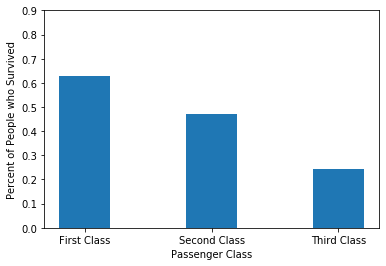

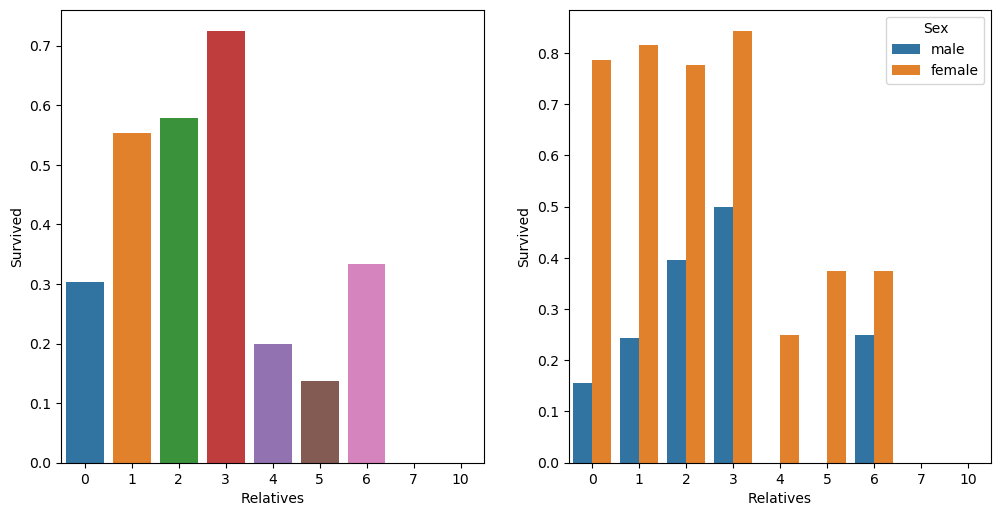

In [17]:
data["Relatives"] = data["SibSp"] + data["Parch"]
data=data.drop(["SibSp", "Parch"], axis=1)

fig, axes = plt.subplots(ncols=2)

fig.set_size_inches(12, 6)
fig.set_dpi(100)
#Relatives and Survival - all
sns.barplot(x="Relatives",y="Survived", data=data, ax=axes[0], ci=None)

#Relatives and Survival - sex hue
sns.barplot(x="Relatives",y="Survived",hue="Sex", data=data, ax=axes[1], ci=None)

In [ ]:
#Extract Title from People name
print(data)
titles = []
data["Title"] = 0
for row in range(len(data["Name"])):
    comma = data["Name"][row].find(',')
    period = data["Name"][row].find('.')
    person_title = data["Name"][row][comma+2:period]
    if(person_title not in titles):
        titles.append(person_title)
    data["Title"][row] = person_title

print(data)
#data = data.drop("Name", axis=1)
#sns.barplot(x="Title", y="Survived", data=data)

In [ ]:
data = data.drop("Name", axis=1)

In [ ]:
#fig, axes = plt.subplots()

#fig.set_size_inches(12, 6)

# mrSurvived = data[data["Title"] == "Mr"]["Survived"]
# print("Mr Survival Rate: ", sum(mrSurvived)/len(mrSurvived))

# mrsSurvived = data[data["Title"] == "Mrs"]["Survived"]
# print("Mrs Survival Rate: ",sum(mrsSurvived)/len(mrsSurvived))



#sns.barplot(x="Title", y="Survived", data=data)

data.replace(["Ms", "Mlle"], "Miss", inplace=True)
data.replace("Mme", "Mrs", inplace=True)

In [ ]:
data.replace("Don", "Master", inplace=True)


In [ ]:
data.replace(["Col", "Capt"], "Major", inplace=True)

In [ ]:
data.replace("Major", "Military", inplace=True)

In [ ]:
data.replace(["Lady", "the Countess"], "Miss", inplace=True)


In [ ]:
data.replace(["Rev", "Military"], "Dr", inplace=True)
data.replace("Dr", "Occupational Title", inplace=True)
data.replace(["Jonkheer", "Sir"], "Mr", inplace=True) 


In [ ]:
sns.barplot(x="Title", y="Survived", data=data, ci=None)

In [ ]:
data["Embarked"].fillna("S", inplace=True)
print(data.isna().sum())

In [ ]:
#Fare Histogram
fig, axes = plt.subplots()
axes.set_xlim(0,300)
axes.set_xticks(range(0,250,25))
sns.distplot(data["Fare"], kde=False, bins=100)


In [ ]:
#pd.cut(data["Fare"], 10, retbins=True)


for x in range(len(data["Fare"])):
    if (data.at[x, "Fare"] >= 0 and data.at[x, "Fare"] <64):
        data.at[x, "Fare"] = 0
    elif (data.at[x, "Fare"] >= 64 and data.at[x, "Fare"] <128):
        data.at[x, "Fare"] = 1
    elif (data.at[x, "Fare"] >= 128 and data.at[x, "Fare"] <192):
        data.at[x, "Fare"] = 2
    elif (data.at[x, "Fare"] >= 192 and data.at[x, "Fare"] <256):
        data.at[x, "Fare"] = 3
    elif (data.at[x, "Fare"] >= 256 and data.at[x, "Fare"] <320):
        data.at[x, "Fare"] = 4
    elif (data.at[x, "Fare"] >= 256 and data.at[x, "Fare"] <320):
        data.at[x, "Fare"] = 5
    elif (data.at[x, "Fare"] >= 320 and data.at[x, "Fare"] <384):
        data.at[x, "Fare"] = 6
    elif (data.at[x, "Fare"] >= 384 and data.at[x, "Fare"] <448):
        data.at[x, "Fare"] = 7
    elif (data.at[x, "Fare"] >= 448 and data.at[x, "Fare"] <513):
        data.at[x, "Fare"] = 8
    else:
        data.at[x, "Fare"] = 9
        


In [ ]:
data["Fare"] = data["Fare"].astype(int)

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols=1)

sns.boxplot(data[data["Pclass"]==1]["Fare"], ax=axes[0])
sns.boxplot(data[data["Pclass"]==2]["Fare"], ax=axes[1])
sns.boxplot(data[data["Pclass"]==3]["Fare"], ax=axes[2])
fig.set_size_inches(8, 12)


In [ ]:
print(data.sort_values(by="Fare", ascending=False))

In [ ]:
#Fare Per Person
data["FarePerPerson"] = data["Fare"] / (data["Relatives"]+1)

data["FarePerPerson"] = data["FarePerPerson"].astype(int)



In [ ]:
#Age times Class
data["Age"].fillna(data["Age"].mean(), inplace=True)

data["AgeTimesClass"] = data["Age"] * data["Pclass"]
data["AgeTimesClass"] = data["AgeTimesClass"].astype(int)
data["Age"] = data["Age"].astype(int)

In [ ]:
print(data)

In [ ]:
#Adding Alone Feature
data["Alone"] = (data["Relatives"] == 0)

data["Alone"] = data["Alone"].astype(int)


In [ ]:
print(data.isna().sum())

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=data, order=[0,1])

In [ ]:
#Embarked location survival percents
embarkedSSurvived = data[data["Embarked"] == "S"]["Survived"] == 1
embarkedCSurvived = data[data["Embarked"] == "C"]["Survived"] == 1
embarkedQSurvived = data[data["Embarked"] == "Q"]["Survived"] == 1

print("Percent of Embarked S people who survived: ", sum(embarkedSSurvived) / len(embarkedSSurvived))
print("Percent of Embarked C people who survived: ", sum(embarkedCSurvived) / len(embarkedCSurvived))
print("Percent of Embarked Q people who survived: ", sum(embarkedQSurvived) / len(embarkedQSurvived))


survivalPercentsBasedonEmbarkedLocation = [sum(embarkedSSurvived) / len(embarkedSSurvived), sum(embarkedCSurvived) / len(embarkedCSurvived), sum(embarkedQSurvived) / len(embarkedQSurvived)]
categories = ["Embarked S", "Embarked C", "Embarked Q"]
xAxisLocations = [0, 1, 2]
plt.bar(xAxisLocations, survivalPercentsBasedonEmbarkedLocation, width=0.5)
plt.xticks(xAxisLocations, categories)
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel("Percent of People who Survived")
plt.xlabel("Embarked Location")
plt.show()


In [ ]:
#Age/Survival Histogram
agesSurvived = data[data["Survived"] == 1]["Age"] #gives ages of those who survived as a Pandas Series
ages = data["Age"]
#ages.hist()
sortedAgesBins = ages.value_counts(bins=8, sort=True).sort_index()

data['ageBins'] = pd.cut(ages, bins=[0,10,20,30,40,50,60,70,80,90,100])
print(data[['Age', "ageBins"]].groupby('Age').sum())


plt.xlabel("Ages")
plt.ylabel("Frequency")


#agesSurvived.hist(xlabelsize = 20)
plt.xlabel("Ages")
plt.ylabel("Frequency of survivors")
sortedAgesSurvivedBins = agesSurvived.value_counts(bins=8, sort=True).sort_index()
percentSurvivedAgeBins = sortedAgesSurvivedBins / sortedAgesBins #Gives percent of people in age bins that survived
#print(percentSurvivedAgeBins.index[0])
listofSurvivalPercents = []
for x in percentSurvivedAgeBins:
    listofSurvivalPercents.append(x)
#print(listofSurvivalPercents)
ageSurvivalPercents = pd.Series(listofSurvivalPercents)
listofBins = []
#print(type(percentSurvivedAgeBins.index[0]))
#plt.hist(ageSurvivalPercents, bins=percentSurvivedAgeBins.index)


In [ ]:
fig, ax = plt.subplots()

males = data[data["Sex"]=="male"]
malesSurvived = males[males["Survived"] == 1]

females = data[data["Sex"]=="female"]
femalesSurvived = females[females["Survived"] == 1]

ax.hist(malesSurvived["Age"], bins=20, alpha=0.6)
ax.hist(femalesSurvived["Age"], bins=20, alpha=0.5)
ax.legend(["Male", "Female"])

In [ ]:
print(data.isna().sum())

In [ ]:
x = data.drop(["Survived", "PassengerId", "Cabin", "Ticket"], axis=1) #keeping Age (even with predicted values) and Fare and removing it doesn't change predictions 
x_OHE = pd.get_dummies(x) #one hot encoding to convert word columns (Sex, Embarked Location) to numbers
y = data["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_OHE,y,test_size=0.2)


clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
survival_predictions = clf.predict(x_test)
print(survival_predictions)
print("Accuracy w Random Forest Classifier:",metrics.accuracy_score(y_test, survival_predictions))


#print(clf.feature_importances_)
featureImportances = pd.DataFrame({"Feature": x_test.columns, "Feature Imp. Values": clf.feature_importances_})
print(featureImportances.sort_values(by=["Feature Imp. Values"]))

# clf = tree.DecisionTreeClassifier()
# clf = clf.fit(x_train, y_train)
# survival_predictions = clf.predict(x_test)
# print(x_test)
# print("Accuracy w Decision Tree Classifier:",metrics.accuracy_score(y_test, survival_predictions))

# acc_decision_tree = round(clf.score(x_train, y_train)*100, 2)

# print ("Other accuracy: ",acc_decision_tree)



# # #print(clf.feature_importances_)
# # featureImportances = pd.DataFrame({"Feature": x_test.columns, "Feature Imp. Values": clf.feature_importances_})
# # #print(featureImportances.sort_values(by=["Feature Imp. Values"]))


# #asdfasdfasdfasdfsadfsdfsadf





In [ ]:
testingData = pd.read_csv("../input/titanic/test.csv")



testingData1 = testingData.drop(["Ticket", "PassengerId", "Cabin"], axis=1)



testingData1["Fare"] = testingData1["Fare"].fillna(testingData["Fare"].mean())
testingData1["Age"] = testingData1["Age"].fillna(testingData["Age"].mean())
testingData1["Relatives"] = testingData1["SibSp"] + testingData1["Parch"]
testingData1.drop(["SibSp", "Parch"], axis=1, inplace=True)
testingData1["Alone"] = (testingData1["Relatives"] == 0)
testingData1["Alone"] = testingData1["Alone"].astype(int)
testingData1["Age"] = testingData1["Age"].astype(int)


titles = []
testingData1["Title"] = 0
for row in range(len(testingData1["Name"])):
    comma = testingData1["Name"][row].find(',')
    period = testingData1["Name"][row].find('.')
    person_title = testingData1["Name"][row][comma+2:period]
    if(person_title not in titles):
        titles.append(person_title)
    testingData1["Title"][row] = person_title


testingData1 = testingData1.drop("Name", axis=1)

testingData1.replace(["Ms","Dona", "Mlle"], "Miss", inplace=True)
testingData1.replace("Mme", "Mrs", inplace=True)
testingData1.replace("Don", "Master", inplace=True)
testingData1.replace(["Col", "Capt"], "Major", inplace=True)
testingData1.replace("Major", "Military", inplace=True)
testingData1.replace(["Lady", "the Countess"], "Miss", inplace=True)
testingData1.replace(["Rev", "Military"], "Dr", inplace=True)
testingData1.replace("Dr", "Occupational Title", inplace=True)
testingData1.replace(["Jonkheer", "Sir"], "Mr", inplace=True) 

#Fare Per Person
testingData1["FarePerPerson"] = testingData1["Fare"] / (testingData1["Relatives"]+1)
testingData1["FarePerPerson"] = testingData1["FarePerPerson"].astype(int)


#Age Times Class
testingData1["AgeTimesClass"] = testingData1["Age"] * testingData1["Pclass"]
testingData1["AgeTimesClass"] = testingData1["AgeTimesClass"].astype(int)



#Fare Categories
for x in range(len(data["Fare"])):
    if (data.at[x, "Fare"] >= 0 and data.at[x, "Fare"] <64):
        data.at[x, "Fare"] = 0
    elif (data.at[x, "Fare"] >= 64 and data.at[x, "Fare"] <128):
        data.at[x, "Fare"] = 1
    elif (data.at[x, "Fare"] >= 128 and data.at[x, "Fare"] <192):
        data.at[x, "Fare"] = 2
    elif (data.at[x, "Fare"] >= 192 and data.at[x, "Fare"] <256):
        data.at[x, "Fare"] = 3
    elif (data.at[x, "Fare"] >= 256 and data.at[x, "Fare"] <320):
        data.at[x, "Fare"] = 4
    elif (data.at[x, "Fare"] >= 256 and data.at[x, "Fare"] <320):
        data.at[x, "Fare"] = 5
    elif (data.at[x, "Fare"] >= 320 and data.at[x, "Fare"] <384):
        data.at[x, "Fare"] = 6
    elif (data.at[x, "Fare"] >= 384 and data.at[x, "Fare"] <448):
        data.at[x, "Fare"] = 7
    elif (data.at[x, "Fare"] >= 448 and data.at[x, "Fare"] <513):
        data.at[x, "Fare"] = 8
    else:
        data.at[x, "Fare"] = 9


testingData1["Fare"] = testingData1["Fare"].astype(int)






testingData1 = pd.get_dummies(testingData1)
print(testingData1)
survival_predictions = clf.predict(testingData1)
# print(testingData["PassengerId"][1:])
df = pd.DataFrame(survival_predictions, columns=["Survived"], index=[testingData["PassengerId"]])
df.to_csv("out4-3-20-MyOwnTesting2.csv")

In [ ]:
data = pd.read_csv("../input/titanic/train.csv")
data["Relatives"] = data["SibSp"] + data["Parch"]

data["alone"] = data["Relatives"] == 0
data["alone"] = data["alone"].astype(int)


x = data.drop(["Ticket","PassengerId", "Survived"], axis=1)
y = data["Survived"]

#print(data.head())

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
x['Title'] = x["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
x['Title'] = x['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
x['Title'] = x['Title'].replace('Mlle', 'Miss')
x['Title'] = x['Title'].replace('Ms', 'Miss')
x['Title'] = x['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
x['Title'] = x['Title'].map(titles)
# filling NaN with 0, to get safe
x['Title'] = x['Title'].fillna(0)

x = x.drop("Name", axis=1)

#x_OHE = pd.get_dummies(x) #one hot encoding to convert word columns (Sex, Embarked Location) to numbers


genders = {"male": 0, "female": 1}
x['Sex'] = x['Sex'].map(genders)



x["Age"].fillna(x["Age"].mean(), inplace=True)
x['Age'] = x['Age'].astype(int)



x.loc[x['Age'] <= 11, 'Age'] = 0
x.loc[(x['Age'] > 11) & (x['Age'] <= 18), 'Age'] = 1
x.loc[(x['Age'] > 18) & (x['Age'] <= 22), 'Age'] = 2
x.loc[(x['Age'] > 22) & (x['Age'] <= 27), 'Age'] = 3
x.loc[(x['Age'] > 27) & (x['Age'] <= 33), 'Age'] = 4
x.loc[(x['Age'] > 33) & (x['Age'] <= 40), 'Age'] = 5
x.loc[(x['Age'] > 40) & (x['Age'] <= 66), 'Age'] = 6
x.loc[ x['Age'] > 66, 'Age'] = 6


x.loc[ x['Fare'] <= 7.91, 'Fare'] = 0
x.loc[(x['Fare'] > 7.91) & (x['Fare'] <= 14.454), 'Fare'] = 1
x.loc[(x['Fare'] > 14.454) & (x['Fare'] <= 31), 'Fare']   = 2
x.loc[(x['Fare'] > 31) & (x['Fare'] <= 99), 'Fare']   = 3
x.loc[(x['Fare'] > 99) & (x['Fare'] <= 250), 'Fare']   = 4
x.loc[ x['Fare'] > 250, 'Fare'] = 5
x['Fare'] = x['Fare'].astype(int)





x['Age_Class']= x['Age']* x['Pclass']
x['Fare_Per_Person'] = x['Fare']/(x['Relatives']+1)
x['Fare_Per_Person'] = x['Fare_Per_Person'].astype(int)


import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [x]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)



x = x.drop("Cabin", axis=1)

x = pd.get_dummies(x)



print(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
survival_predictions = clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, survival_predictions))





In [ ]:
featureImportances = pd.DataFrame({"Feature": x_test.columns, "Feature Imp. Values": clf.feature_importances_})
print(featureImportances.sort_values(by=["Feature Imp. Values"]))

In [ ]:
#TESTING MODEL WITH TEST CSV

data = pd.read_csv("../input/titanic/test.csv")
data["Relatives"] = data["SibSp"] + data["Parch"]

data["alone"] = data["Relatives"] == 0
data["alone"] = data["alone"].astype(int)


x = data.drop(["Ticket","PassengerId"], axis=1)
#y = data["Survived"]

#print(data.head())

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
x['Title'] = x["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
x['Title'] = x['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
x['Title'] = x['Title'].replace('Mlle', 'Miss')
x['Title'] = x['Title'].replace('Ms', 'Miss')
x['Title'] = x['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
x['Title'] = x['Title'].map(titles)
# filling NaN with 0, to get safe
x['Title'] = x['Title'].fillna(0)

x = x.drop("Name", axis=1)

#x_OHE = pd.get_dummies(x) #one hot encoding to convert word columns (Sex, Embarked Location) to numbers


genders = {"male": 0, "female": 1}
x['Sex'] = x['Sex'].map(genders)



x["Age"].fillna(x["Age"].mean(), inplace=True)
x['Age'] = x['Age'].astype(int)



x.loc[x['Age'] <= 11, 'Age'] = 0
x.loc[(x['Age'] > 11) & (x['Age'] <= 18), 'Age'] = 1
x.loc[(x['Age'] > 18) & (x['Age'] <= 22), 'Age'] = 2
x.loc[(x['Age'] > 22) & (x['Age'] <= 27), 'Age'] = 3
x.loc[(x['Age'] > 27) & (x['Age'] <= 33), 'Age'] = 4
x.loc[(x['Age'] > 33) & (x['Age'] <= 40), 'Age'] = 5
x.loc[(x['Age'] > 40) & (x['Age'] <= 66), 'Age'] = 6
x.loc[ x['Age'] > 66, 'Age'] = 6

x["Fare"].fillna(x["Fare"].mean(), inplace=True)
x.loc[ x['Fare'] <= 7.91, 'Fare'] = 0
x.loc[(x['Fare'] > 7.91) & (x['Fare'] <= 14.454), 'Fare'] = 1
x.loc[(x['Fare'] > 14.454) & (x['Fare'] <= 31), 'Fare']   = 2
x.loc[(x['Fare'] > 31) & (x['Fare'] <= 99), 'Fare']   = 3
x.loc[(x['Fare'] > 99) & (x['Fare'] <= 250), 'Fare']   = 4
x.loc[ x['Fare'] > 250, 'Fare'] = 5



x['Fare'] = x['Fare'].astype(int)





x['Age_Class']= x['Age']* x['Pclass']
x['Fare_Per_Person'] = x['Fare']/(x['Relatives']+1)
x['Fare_Per_Person'] = x['Fare_Per_Person'].astype(int)


import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [x]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)



x = x.drop("Cabin", axis=1)

x = pd.get_dummies(x)


survival_predictions = clf.predict(x)
# print(testingData["PassengerId"][1:])
df = pd.DataFrame(survival_predictions, columns=["Survived"], index=[testingData["PassengerId"]])
df.to_csv("out4-1-20-2nd.csv")